# Keep results 

## Github

In [71]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Github/
username = "AEmanuelli"
git_token = ""
repository_name = "RL_internship"

%cd /content
!git clone https://{git_token}@github.com/{username}/{repository_name}
%cd {repository_name}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Github
/content
Cloning into 'RL_internship'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 575 bytes | 575.00 KiB/s, done.
/content/RL_internship


In [80]:
# !git config --global user.email "accent.cartilage0r@icloud.com"
# !git config --global user.name "AEmanuelli"

%cd /content/drive/MyDrive/Colab Notebooks/RL_internship.ipynb
!git commit -m "notebook" 
!git push 

/content/drive/MyDrive/Colab Notebooks
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [1]:
!git 

In [2]:
#!git remote -v

## Send mail function

In [3]:
# import os
# import smtplib
# from email.mime.multipart import MIMEMultipart
# from email.mime.text import MIMEText
# from email.mime.application import MIMEApplication
# from zipfile import ZipFile

# def send_results(output_dir, title):
#     # Adresse email de l'expéditeur et mot de passe
#     username = 'aemanuelli235@gmail.com'
#     password = 'btytcsidrjvryqtn'

#     # Adresse email du destinataire
#     to_address = 'alexis.emanuelli@psl.eu'#, 'mathias.vigouroux2@gmail.com']

#     # Objet et contenu de l'email
#     subject = f'{title} - Résultats de la simulation'
#     msg = 'Babinks mon gaté, voilà les résultats'

#     # Création de l'objet MIMEMultipart
#     message = MIMEMultipart()

#     # Ajout du sujet et du contenu au MIMEMultipart
#     message['Subject'] = subject
#     message.attach(MIMEText(msg))

#     # Création d'un fichier zip
#     zip_path = os.path.join(output_dir, 'results.zip')
#     with ZipFile(zip_path, 'w') as zip:
#         for dirpath, dirnames, filenames in os.walk(output_dir):
#             for filename in filenames:
#                 filepath = os.path.join(dirpath, filename)
#                 # Vérification de la taille du fichier
#                 if os.path.getsize(filepath) < 5 * 1024 * 1024: # 5 Mo
#                     zip.write(filepath, filename)

#     # Ajout du fichier zip comme pièce jointe au message
#     with open(output_dir, 'rb') as attachment:
#         attachment_part = MIMEApplication(attachment.read(), Name=f'{title}.png')
#         attachment_part["Content-Disposition"] = f"attachment; filename={title}.png"
#         message.attach(attachment_part)

#     # Connexion au serveur SMTP de Gmail
#     server = smtplib.SMTP('smtp.gmail.com', 587)
#     server.starttls()
#     server.login(username, password)

#     # Envoi de l'email
#     server.sendmail(username, to_address, message.as_string())
#     server.quit()

#     print('Email envoyé avec succès !')


# Modèle de base

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class QLearning:
    def __init__(self, alpha=0.1, num_steps=10000, temperature=2):
        self.alpha = alpha # learning rate
        self.num_steps = num_steps
        self.temperature = temperature # epsilon value for epsilon-greedy policy
        
        # List to store Q values and rewards
        self.state0_rewards = [0]*num_steps
        self.state1_rewards = [0]*num_steps
        
        # Initialize Q-matrix with zeros
        self.Q = np.zeros((1+num_steps,2, 2))
        
        # Define state transition probabilities
        self.P = np.array([[[0.25, 0.75], [0.75, 0.25]],
                           [[0.75, 0.25], [0.25, 0.75]]])
        
    def run(self):
        # Initialize state randomly
        state = np.random.randint(0, 2)

        # Q-learning algorithm
        for i in range(self.num_steps):
            logits = self.Q[i][state]/self.temperature
            # Compute softmax probabilities
            probs = np.exp(logits) / np.sum(np.exp(logits))

            ### epsilon part 
            # if np.random.random() < epsilon:
            #     # Choose a random action
            #     action = np.random.randint(0, 2)
            # else:
            #     # Choose the action with the highest Q-value
            #     action = np.argmax(Q[state])


            ### Softmax part
            ##action chosen randomly on the basis of the probabilities
            action = np.random.choice([0, 1], p=probs)
            next_state = np.random.choice([0, 1], p=self.P[state, action])
            reward = -1 if next_state == state else 1

            if state == 0:
                self.state0_rewards[i] = reward
                self.state1_rewards[i] = None
            else:
                self.state1_rewards[i] = reward
                self.state0_rewards[i] = None
            
            # Update Q-value for current state-action pair
            
            self.Q[i][state, action] = self.Q[i-1][state, action]-self.alpha * (self.Q[i-1][state, action] - reward)
            self.Q[i+1] = self.Q[i]
            state = next_state # update state
            
    def plot(self):
        # Plot Q values and reward over time
        fig, axs = plt.subplots(2)
        axs[0].plot(self.Q[:, 0, 0], label='Q(0,A)')
        axs[0].plot(self.Q[:, 0, 1], label='Q(0,B)')
        axs[0].plot(self.Q[:, 1, 0], label='Q(1,A)')
        axs[0].plot(self.Q[:, 1, 1], label='Q(1,B)')
        axs[0].legend()

        axs[1].plot(self.state0_rewards, 'o', markersize = 2, label ="Rewards for state 0" )
        axs[1].plot(self.state1_rewards, 'o', markersize = 2, label = "Rewards for state 1")
        axs[1].legend()

        axs[0].set_xlabel('Time step')
        axs[0].set_ylabel('Q-value')
        plt.show()
        print(self.Q.mean(axis = 0))

In [ ]:
class QLearning_reward:
    def __init__(self, alpha=0.1, num_steps=10000, temperature=2):
        self.alpha = alpha # learning rate
        self.num_steps = num_steps
        self.temperature = temperature # epsilon value for epsilon-greedy policy
        
        # List to store Q values and rewards
        self.state0_rewards = [0]*num_steps
        self.state1_rewards = [0]*num_steps
        
        # Initialize Q-matrix with zeros
        self.Q = np.zeros((1+num_steps,2, 2))
        
        # Define state transition probabilities
        self.P = np.array([[[0.25, 0.75], [0.75, 0.25]],
                           [[0.75, 0.25], [0.25, 0.75]]])

        
    def run(self, p, beta):
        # Initialize state randomly
        state = np.random.randint(0, 2)

        # Q-learning algorithm
        total_reward = 0
        for i in range(self.num_steps):
            logits = self.Q[state]/self.temperature
            # Compute softmax probabilities
            probs = np.exp(logits) / np.sum(np.exp(logits))

            # Choose action probabilistically based on the probabilities
            action = np.random.choice([0, 1], p=probs)
            next_state = np.random.choice([0, 1], p=self.P[state, action])
            reward = 1 if np.random.random() < p else -1

            # Update Q-value for current state-action pair
            alpha = self.alpha_plus if reward == 1 else self.alpha_minus
            self.Q[state, action] += alpha * (reward + beta * np.max(self.Q[next_state]) - self.Q[state, action])
            total_reward += reward
            state = next_state # update state
        
        return total_reward

    def plot(self, beta_range, p_range):
        # Generate 2D grid of beta and p values
        beta_grid, p_grid = np.meshgrid(beta_range, p_range)
        # Initialize array to store total rewards
        rewards_grid = np.zeros_like(beta_grid)
        
        # Compute total rewards for each combination of beta and p
        for i in range(len(beta_range)):
            for j in range(len(p_range)):
                rewards_grid[j,i] = self.run(p_range[j], beta_range[i])
        
        # Plot total rewards as a function of beta and p
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(beta_grid, p_grid, rewards_grid, cmap='viridis')
        ax.set_xlabel('Beta')
        ax.set_ylabel('P')
        ax.set_zlabel('Total Reward')
        plt.show()


## Varying the temperature

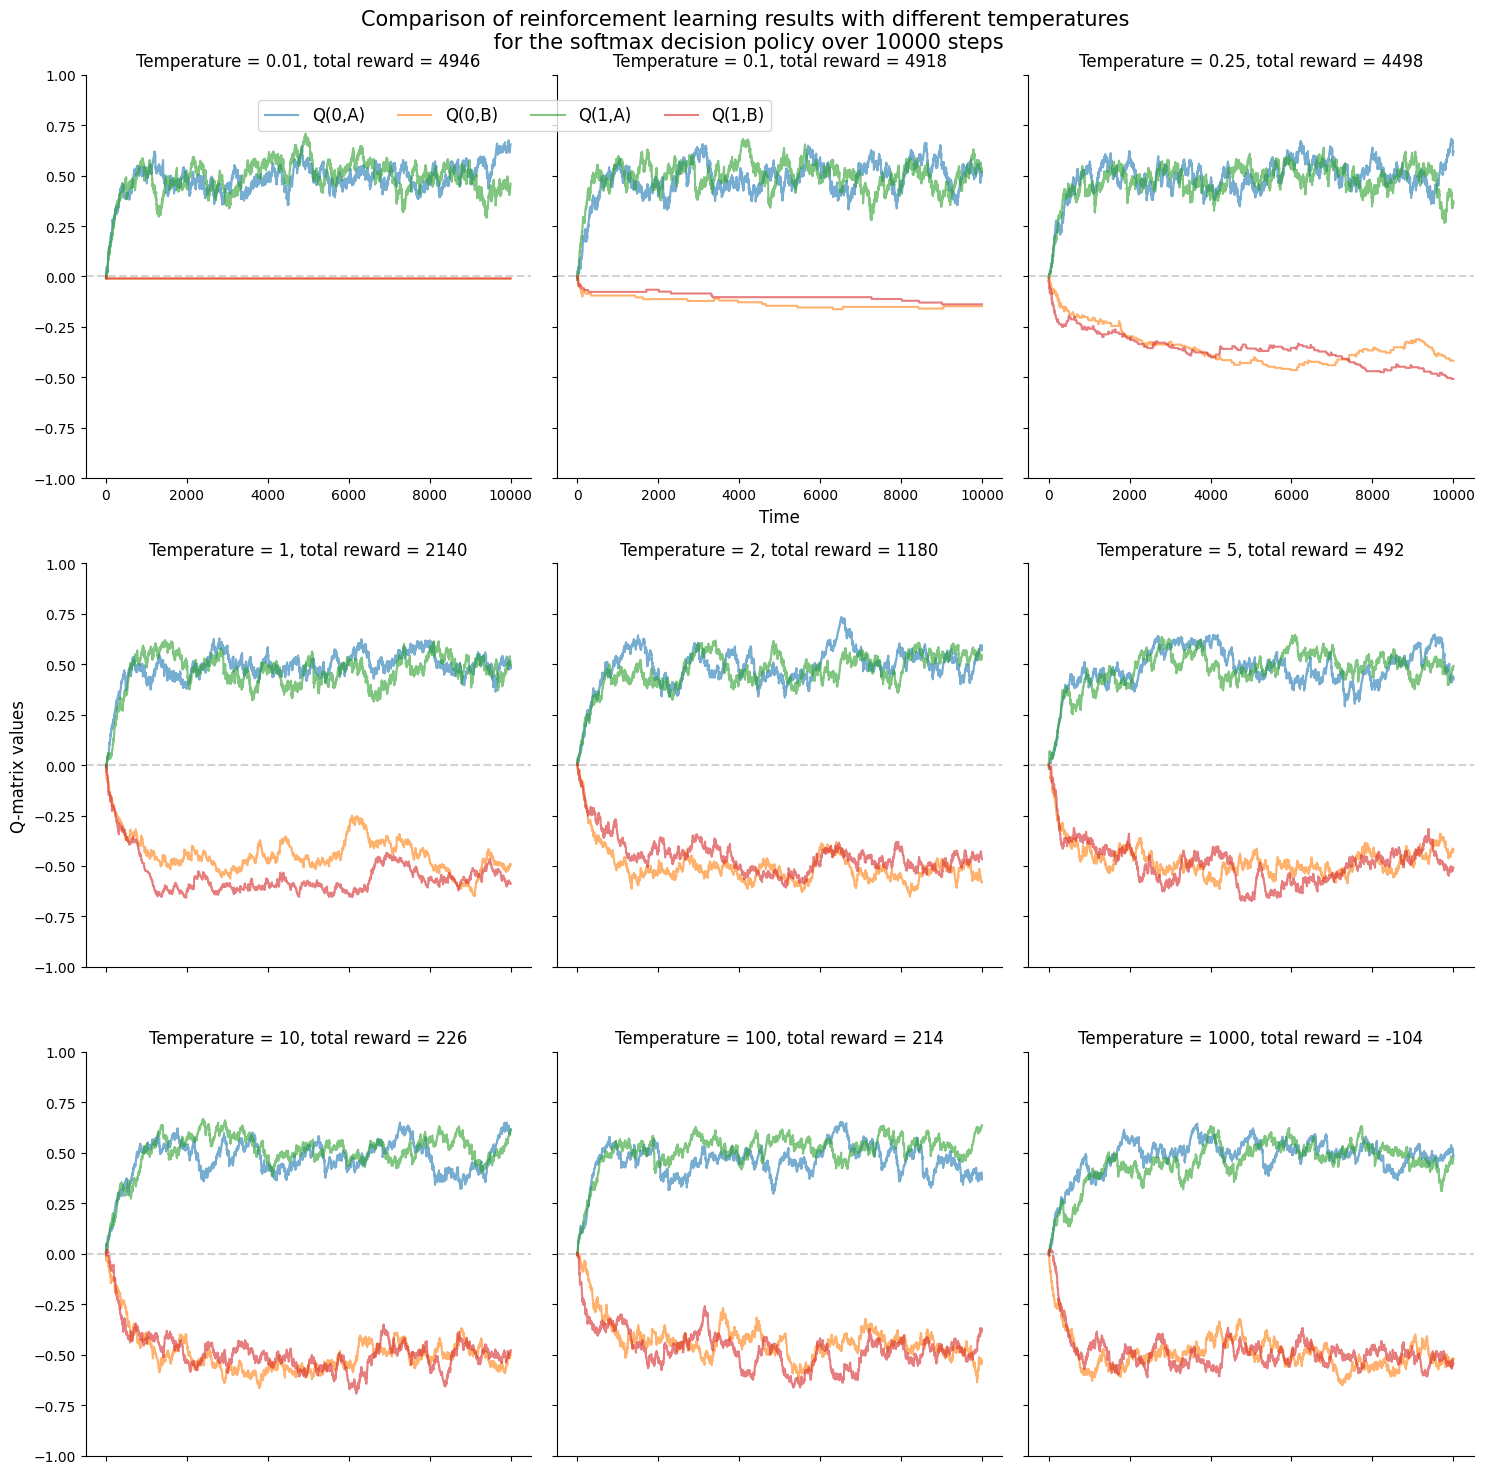

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))
temperatures = [1e-2,.1, 0.25, 1, 2, 5, 10, 100, 1000]

for i in range(3):
    for j in range(3):
        temp = temperatures[i*3+j]
        ql = QLearning(alpha = .01, temperature=temp)
        ql.run()
        #compute total reward
        state0_rewards = np.array([0 if x is None else x for x in ql.state0_rewards])
        state1_rewards = np.array([0 if x is None else x for x in ql.state1_rewards])
        total_reward = np.sum(state1_rewards) + np.sum(state0_rewards)

        axs[i,j].set_ylim(-1, 1)
        # remove the x labels everywhere but on the bottom line 
        if i!=0:
            axs[i,j].set_xticklabels([])
        else : 
            if j==1 : 
              axs[i,j].set_xlabel('Time', fontsize=12)
        # remove the y labels everywhere but on the first column
        if j != 0:
            axs[i,j].set_yticklabels([])
        else : 
          if i ==1 : 
              axs[i,j].set_ylabel('Q-matrix values', fontsize=12)
        axs[i, j].plot(ql.Q[:, 0, 0], label='Q(0,A)', alpha=0.6)
        axs[i, j].plot(ql.Q[:, 0, 1], label='Q(0,B)', alpha=0.6)
        axs[i, j].plot(ql.Q[:, 1, 0], label='Q(1,A)', alpha=0.6)
        axs[i, j].plot(ql.Q[:, 1, 1], label='Q(1,B)', alpha=0.6)
        axs[i, j].set_title(f"Temperature = {temp}, total reward = {total_reward}")
        axs[i, j].set_ylim(-1, 1)
        axs[i, j].axhline(y=0, linestyle='--', color='lightgray')
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['top'].set_visible(False)
        if (i,j)==(0,0) :
          fig.legend(ncols = 4,bbox_to_anchor=(0.17, 0.925), loc = 'upper left', fontsize=12, fancybox = True)


fig.suptitle(f'Comparison of reinforcement learning results with different temperatures\n for the softmax decision policy over {ql.num_steps} steps',
             fontdict={'weight': 'bold'}, fontsize=15)

plt.tight_layout()
plt.show()

# Modèle avec confirmation bias

## Implémentation de la classe

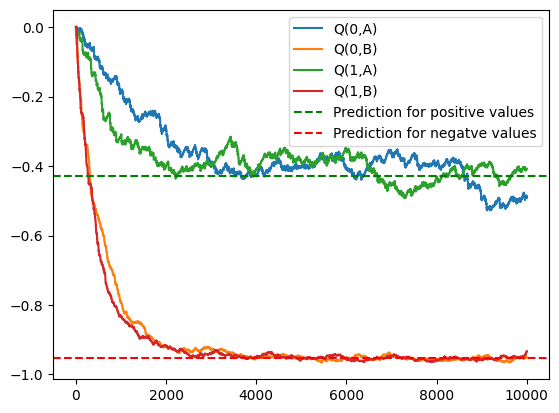

<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt


class QLearning:
    def __init__(self, alpha_plus=0.01, num_steps=10000, temperature=2, alpha_minus=0.01, p = .25):
        self.alpha_plus = alpha_plus # learning rate
        self.num_steps = num_steps
        self.temperature = temperature # epsilon value for epsilon-greedy policy
        self.alpha_minus = alpha_minus # confirmation bias factor
        
        # List to store Q values and rewards
        self.state0_rewards = [0]*num_steps
        self.state1_rewards = [0]*num_steps
        self.total_reward = 0
        # Initialize Q-matrix with zeros
        self.Q = np.zeros((1+num_steps,2, 2))
        self.p = p

        # Define state transition probabilities
        self.P = np.array([[[p, 1-p], [1-p, p]],
                           [[1-p, p], [p, 1-p]]])
        
    def run(self):
        # Initialize state randomly
        state = np.random.randint(0, 2)

        # Q-learning algorithm
        for i in range(self.num_steps):
            logits = self.Q[i][state]/self.temperature
            # Compute softmax probabilities
            probs = np.exp(logits) / np.sum(np.exp(logits))
            action = np.random.choice([0, 1], p=probs)
            next_state = np.random.choice([0, 1], p=self.P[state, action])
            reward = -1 if next_state == state else 1
            self.total_reward+= reward
            if state == 0:
                self.state0_rewards[i] = reward
                self.state1_rewards[i] = None
            else:
                self.state1_rewards[i] = reward
                self.state0_rewards[i] = None
                
            # Update Q-value for current state-action pair
            Q_old = self.Q[i-1][state, action]
            Q_new = Q_old + ((self.alpha_plus if reward - Q_old >= 0 else self.alpha_minus) * (reward-Q_old))
            self.Q[i][state, action] = Q_new

            self.Q[i+1] = self.Q[i]
            state = next_state # update state

    def plot(self):
            # Plot Q values and reward over time
            fig, axs = plt.subplots()
            axs.plot(self.Q[:, 0, 0], label='Q(0,A)')
            axs.plot(self.Q[:, 0, 1], label='Q(0,B)')
            axs.plot(self.Q[:, 1, 0], label='Q(1,A)')
            axs.plot(self.Q[:, 1, 1], label='Q(1,B)')
            
            y_minus = (self.p*self.alpha_plus - (1-self.p)*self.alpha_minus)/(
                    self.p*self.alpha_plus + (1-self.p)* self.alpha_minus)
            y_plus = ((1-self.p)*self.alpha_plus - self.p*self.alpha_minus)/(
                (1-self.p)*self.alpha_plus + self.p*self.alpha_minus)
            axs.axhline(y=y_plus, linestyle='--', color='green', label='Prediction for positive values')
            axs.axhline(y=y_minus, linestyle='--', color='red', label='Prediction for negatve values')
            axs.legend()

            # axs[1].plot(self.state0_rewards, 'o', markersize = 2, label ="Rewards for state 0" )
            # axs[1].plot(self.state1_rewards, 'o', markersize = 2, label = "Rewards for state 1")
            # axs[1].legend()
            plt.show()
    

np.random.seed(42)
q_learning = QLearning(num_steps=10000, alpha_plus = .001, temperature=2, p = .2)
q_learning.run()
q_learning.plot()

# sauvegarde de l'image plot dans un dossier spécifique
#plt.savefig("test.png")
#send_results("/", "test")

## varying $\alpha_-, \alpha_+$

In [5]:
# alpha_minus_values = np.logspace(-3, -2, num=5, endpoint=True).round(4).tolist()
# alpha_plus_values = np.logspace(-3, -2, num=5, endpoint=True).round(4).tolist()

alpha_minus_values = [0.001, 0.0025, 0.005, 0.0075, 0.01]
alpha_plus_values = [0.001, 0.0025, 0.005, 0.0075, 0.01]

# initialisation of the models
q_learning_instances = []

for i, alpha_minus in enumerate(alpha_minus_values):
    for j, alpha_plus in enumerate(alpha_plus_values):
        # Create and append a new instance of QLearning to the list
        q_learning_instances.append(QLearning(alpha_plus=alpha_plus, alpha_minus=alpha_minus, num_steps=25000, temperature=2, p=.25))
        q_learning_instances[-1].run()

KeyboardInterrupt: ignored

In [ ]:
# figure
num_rows = len(alpha_minus_values)
num_cols = len(alpha_plus_values)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 18))
ymin, ymax = -1, 1

# plot loop
for i, alpha_minus in reversed(list(enumerate(alpha_minus_values))):
    for j, alpha_plus in enumerate(alpha_plus_values):
        ax = axs[num_rows-1-i, j]
        ax.set_ylim(ymin, ymax)
        # remove the x labels everywhere but on the bottom line 
        if i!=0:
            ax.set_xticklabels([])
        else : 
            if j==2 : 
              ax.set_xlabel('Time', fontsize=12)
        # remove the y labels everywhere but on the first column
        if j != 0:
            ax.set_yticklabels([])
        else : 
          if i ==2 : 
              ax.set_ylabel('Q-matrix values', fontsize=12)
        # remove spines on the top and right
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        # add gray reference line at y=0
        ax.axhline(y=0, linestyle='--', color='lightgray')
        
        #add the predicted value
        y_minus = (q_learning_instances[-1].p*alpha_plus - 
                  (1-q_learning_instances[-1].p)*alpha_minus) / (
                      q_learning_instances[-1].p*alpha_plus + 
                  (1-q_learning_instances[-1].p)*alpha_minus)
        y_plus = ((1-q_learning_instances[-1].p)*alpha_plus - 
                q_learning_instances[-1].p*alpha_minus) / (
                    (1-q_learning_instances[-1].p)*alpha_plus + 
                q_learning_instances[-1].p*alpha_minus)

        ax.axhline(y=y_plus, linestyle='--', color='green', label='Prediction for positive values')
        ax.axhline(y=y_minus, linestyle='--', color='red', label='Prediction for negatve values')
        
        ax.plot(q_learning_instances[i*num_cols+j].Q[:, 0, 0], label='Q(0,A)', alpha=0.6)
        ax.plot(q_learning_instances[i*num_cols+j].Q[:, 0, 1], label='Q(0,B)', alpha=0.6)
        ax.plot(q_learning_instances[i*num_cols+j].Q[:, 1, 0], label='Q(1,A)', alpha=0.6)
        ax.plot(q_learning_instances[i*num_cols+j].Q[:, 1, 1], label='Q(1,B)', alpha=0.6)
        

        ax.set_title(f"$\\alpha_-$={alpha_minus:.4f}, $\\alpha_+$={alpha_plus:.4f}", fontsize=10)

# avoid repetitions in the legend
handles, labels = ax.get_legend_handles_labels()
handles = handles[:6]
labels = labels[:6]

fig.suptitle(f'Confrontation of analytical and computational results of the reinforcement learning algorithm for different \n possible confirmation biases with softmax decision policy with a temperature of {q_learning_instances[-1].temperature}, for p = {q_learning_instances[-1].p}, over {q_learning_instances[-1].num_steps} steps', 
             fontdict={'weight': 'bold'}, fontsize = 20)
fig.legend(handles, labels, ncols = 6,bbox_to_anchor=(0.17, 0.925), loc = 'upper left', fontsize=12, fancybox = True)
plt.show()

## Higher $\alpha$ values 

In [ ]:
alpha_minus_values = np.logspace(-2, -0, num=5, endpoint=True).round(4).tolist()
alpha_plus_values = np.logspace(-2, -0, num=5, endpoint=True).round(4).tolist()

num_rows = len(alpha_minus_values)
num_cols = len(alpha_plus_values)

# initialisation of the models
q_learning_instances_highl = []

for i, alpha_minus in enumerate(alpha_minus_values):
    for j, alpha_plus in enumerate(alpha_plus_values):
        # Create and append a new instance of QLearning to the list
        q_learning_instances_highl.append(QLearning(alpha_plus=alpha_plus, alpha_minus=alpha_minus, num_steps=10000, temperature=2))
        q_learning_instances_highl[-1].run()

In [ ]:
# figure
num_rows = len(alpha_minus_values)
num_cols = len(alpha_plus_values)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 18))
ymin, ymax = -1, 1

# plot loop
for i, alpha_minus in enumerate(alpha_minus_values):
    for j, alpha_plus in enumerate(alpha_plus_values):
        ax = axs[i, j]
        ax.set_ylim(ymin, ymax)
        ax.plot(q_learning_instances_highl[i*num_cols+j].Q[:, 0, 0], label='Q(0,A)')
        ax.plot(q_learning_instances_highl[i*num_cols+j].Q[:, 0, 1], label='Q(0,B)')
        ax.plot(q_learning_instances_highl[i*num_cols+j].Q[:, 1, 0], label='Q(1,A)')
        ax.plot(q_learning_instances_highl[i*num_cols+j].Q[:, 1, 1], label='Q(1,B)')
        ax.set_title(f"$\\alpha_-$={alpha_minus}, $\\alpha_+$={alpha_plus}", fontsize = 10)
        ax.legend(fontsize=8)
plt.show()

## Variating jointly $\alpha_-, \alpha_+$, $p$ and temperature

In [11]:
import os  

# Define the range of parameters
temperatures = np.logspace(-2, 1, num=10)
ps = np.linspace(0, 1, num=10)
num_steps = 10000
# Define the values of alpha+ and alpha- to test
alphas_plus = [0.001, .0025, .005,.0075, 0.01]
alphas_minus = [0.001, .0025, .005,.0075, 0.01]

# Define the function to compute the total reward
def compute_reward(temperature, p, alpha_plus, alpha_minus, num_steps):
    ql = QLearning(alpha_plus=alpha_plus, alpha_minus=alpha_minus, temperature=temperature, p=p)
    ql.run()
    return ql.total_reward


rewards_file = f"rewards_{len(temperatures)}x{len(alphas_plus)}_finalaskip.npy"
if os.path.isfile(rewards_file):
    # If the rewards file already exists, load the rewards from the file instead of computing them
    rewards = np.load(rewards_file)
else:
    rewards = np.zeros((len(temperatures), len(ps), len(alphas_plus), len(alphas_minus)))
    for i, temperature in enumerate(temperatures):
        for j, p in enumerate(ps):
            for k, alpha_plus in enumerate(alphas_plus):
                for l, alpha_minus in enumerate(alphas_minus):
                    rewards[i, j, k, l] = compute_reward(temperature, p, alpha_plus, alpha_minus, num_steps)
    np.save(rewards_file, rewards)

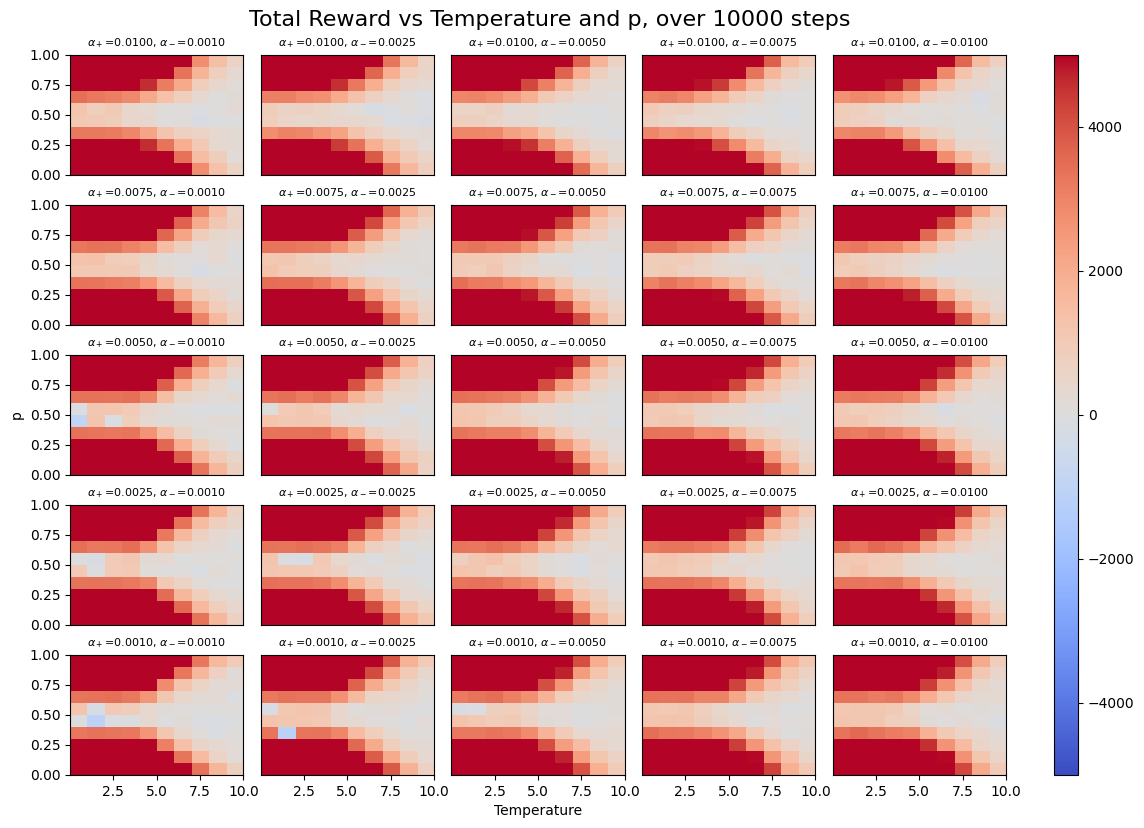

In [65]:
# Set the figure size and create the grid of subplots using GridSpec
fig = plt.figure(figsize=(12, 9))
gs = gridspec.GridSpec(len(alphas_plus), len(alphas_minus), figure=fig, wspace=0.1, hspace=0.25 )

# Add the subplots to the grid
axs = []
for k, alpha_plus in enumerate(reversed(list(alphas_plus))):
    row = []
    for l, alpha_minus in enumerate(alphas_minus):
        ax = fig.add_subplot(gs[k, l])
        row.append(ax)
        if (k,l) == (4,2):
            ax.set_xlabel('Temperature')
        elif (k,l) == (2,0): 
            ax.set_ylabel('p')
        if k !=4 and l!=0 :
          ax.tick_params(axis='both', length=0, labelbottom=False, labelleft=False)
        else : 
          if k==4 and (k,l)!=(4,0) : 
            ax.tick_params(axis = "y", length = 0, labelbottom=True, labelleft=False)
          elif l==0 and (k,l)!=(4,0): 
            ax.tick_params(axis = "x", length = 0, labelbottom=False, labelleft=True)
        ax.set_title(f'$\\alpha_+$={alpha_plus:.4f}, $\\alpha_-$={alpha_minus:.4f}', fontsize=8)
        
        im = ax.imshow(rewards[:, :, k, l].T, origin='lower', extent=[temperatures[0], temperatures[-1], ps[0], ps[-1]], cmap='coolwarm', aspect='auto', vmin=-5000, vmax=5000)
    axs.append(row)

# Add the colorbar to the figure
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
fig.colorbar(im, cax=cbar_ax)

# Adjust the spacing between the subplots and the colorbar
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.88, top=0.9, wspace=0.3, hspace=0.3)

# Add the global title to the figure
fig.suptitle(f'Total Reward vs Temperature and p, over {num_steps} steps', fontsize=16, y=0.95)

# Save the figure and display it
plt.savefig("heatmap_t_vs_p_beautiful_5_values_low_temp_and_high_thresh")
plt.show()


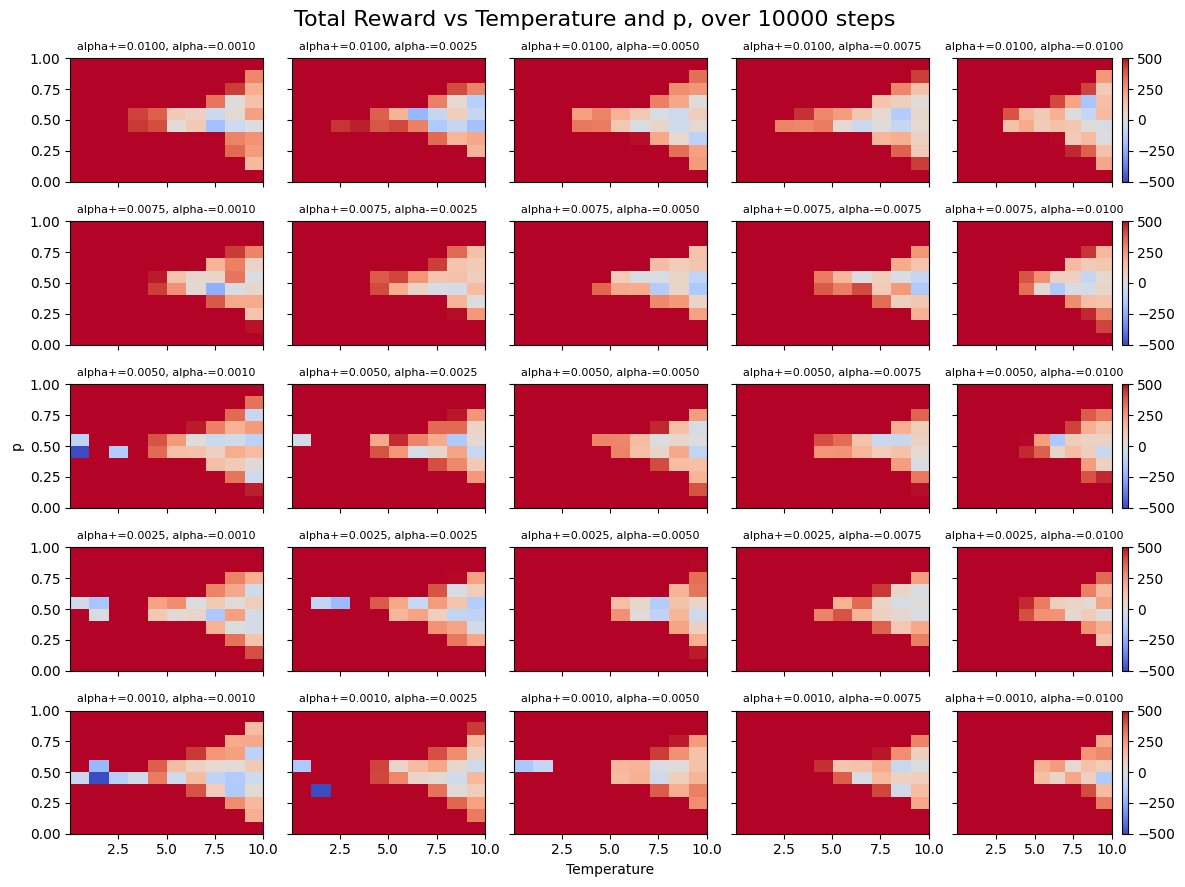

In [30]:
# Plot the results
fig, axs = plt.subplots(len(alphas_plus), len(alphas_minus), figsize=(12, 9), sharex=True, sharey=True)
fig.suptitle(f'Total Reward vs Temperature and p, over {num_steps} steps', fontsize=16)
for k, alpha_plus in enumerate(reversed(list(alphas_plus))):
    for l, alpha_minus in enumerate(alphas_minus):
        ax = axs[k, l]
        if (k,l) == (4,2) :
            ax.set_xlabel('Temperature')
        elif (k,l) == (2,0) : 
            ax.set_ylabel('p')
        ax.set_title(f'alpha+={alpha_plus:.4f}, alpha-={alpha_minus:.4f}', fontsize = 8)
        im = ax.imshow(rewards[:, :, k, l].T, origin='lower', extent=[temperatures[0], temperatures[-1], ps[0], ps[-1]], cmap='coolwarm', aspect='auto', vmin=-500, vmax=500)
        if l == 4:
            fig.colorbar(im, ax=ax, shrink=1)
plt.tight_layout()
# sauvegarde de l'image plot dans un dossier spécifique
plt.savefig("heatmap_t_vs_p_slight_variations")
plt.show()

# Multi-agent with confirmation bias 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class QLearning:
    def __init__(self, num_agents = 2, num_steps = 10000, temperature = 2, alpha_plus = .01, alpha_minus = .01, p = .25, influence = .1):
        self.num_agents = num_agents
        self.num_steps = num_steps
        
        # Check that the length of the arrays is equal to num_agents
        def set_parameters(param, num_agents):
            if isinstance(param, (float, int)):
                return [param] * num_agents
            elif len(param) == num_agents:
                return param
            else:
                raise ValueError(f"Length of {param} array must be equal to num_agents.")

        self.alpha_plus = set_parameters(alpha_plus, num_agents)
        self.alpha_minus = set_parameters(alpha_minus, num_agents)
        self.temperature = set_parameters(temperature, num_agents)
        self.influence = set_parameters(influence, num_agents)


    
        # Initialize Q-values and state transition probabilities
        self.Q = np.zeros((self.num_steps + 1, 2, 2, self.num_agents))
        self.P = np.array([[[0.9, 0.1], [0.1, 0.9]], [[0.1, 0.9], [0.9, 0.1]]])

        # Initialize state and state rewards
        self.state = np.random.randint(0, 2, self.num_agents)
        self.state_rewards = np.zeros((self.num_agents, self.num_steps))

        self.p = p

        # Define state transition probabilities
        self.P = np.array([[[p, 1 - p], [1 - p, p]],
                           [[1 - p, p], [p, 1 - p]]])



    # def run(self):
    #     # Initialize state randomly
    #     state = np.random.randint(0, 2, self.num_agents)

    #             # Q-learning algorithm
    #     for i in range(self.num_steps):
    #         for j in range(self.num_agents):
    #             logits = self.Q[i][state[j], :, j] / self.temperature
    #             # Compute softmax probabilities
    #             probs = np.exp(logits) / np.sum(np.exp(logits))

    #             # Add influence parameter
    #             action_1 = np.random.choice([0, 1], p=probs)
    #             action_2 = np.random.choice([0, 1], p=probs)
    #             if j == 0:
    #                 probs += self.influence * (1 - probs[action_2])
    #             elif j == 1:
    #                 probs += self.influence * (1 - probs[action_1])

    #             probs /= np.sum(probs)
    #             action = np.random.choice([0, 1], p=probs)
                
    #             next_state = np.random.choice([0, 1], p=self.P[state[j], action])
    #             reward = -1 if next_state == state[j] else 1

    #             self.state_rewards[j][i] = reward

    #             # Update Q-value for current state-action pair
    #             Q_old = self.Q[i - 1][state[j], action, j]
    #             Q_new = Q_old + ((self.alpha_plus if reward - Q_old >= 0 else self.alpha_minus) * (reward - Q_old))
    #             self.Q[i][state[j], action, j] = Q_new

    #             state[j] = next_state  # update state

    #         self.Q[i + 1] = self.Q[i]


    def run(self):

        # Initialize states randomly
        states = np.random.randint(0, 2, self.num_agents)

        # Q-learning algorithm
        for i in range(self.num_steps):
            for j in range(self.num_agents):
                # Compute influence term
                influence_term = 0
                for k in range(self.num_agents):
                    if k != j:
                        influence_term += self.influence[j] * (self.Q[i][states[k], :, k].argmax() - self.Q[i][states[j], :, j].argmax())

                logits = (self.Q[i][states[j], :, j] + influence_term) / self.temperature[j]
                # Compute softmax probabilities
                probs = np.exp(logits) / np.sum(np.exp(logits))
                action = np.random.choice([0, 1], p=probs)
                next_state = np.random.choice([0, 1], p=self.P[states[j], action])
                reward = -1 if next_state == states[j] else 1

                self.state_rewards[j][i] = reward

                # Update Q-value for current state-action pair
                Q_old = self.Q[i - 1][states[j], action, j]
                Q_new = Q_old + ((self.alpha_plus[j] if reward - Q_old >= 0 else self.alpha_minus[j]) * (reward - Q_old))
                self.Q[i][states[j], action, j] = Q_new

                states[j] = next_state  # update state

            self.Q[i + 1] = self.Q[i]





    def plot(self):
        # Plot Q values and reward over time
        fig, axs = plt.subplots(self.num_agents, figsize=(10, 8))
        fig.suptitle(f'Q-Values Over Time for All Agents\nTemperature = {self.temperature}, $\\alpha_-$ = {self.alpha_minus}, $\\alpha_+$ = {self.alpha_plus}\nNumber of Steps = {self.num_steps}')

        for j in range(self.num_agents):
            ax = axs[j]
            ax.plot(self.Q[:, 0, 0, j], label='Q(0,A)', alpha=.6)
            ax.plot(self.Q[:, 0, 1, j], label='Q(0,B)', alpha=.6)
            ax.plot(self.Q[:, 1, 0, j], label='Q(1,A)', alpha=.6)
            ax.plot(self.Q[:, 1, 1, j], label='Q(1,B)', alpha=.6)

            # y_minus = (self.p*self.alpha_plus - (1-self.p)*self.alpha_minus) / (self.p*self.alpha_plus + (1-self.p)* self.alpha_minus)
            # y_plus = ((1-self.p)*self.alpha_plus - self.p*self.alpha_minus) / ((1-self.p)*self.alpha_plus + self.p*self.alpha_minus)
            # ax.axhline(y=y_plus, linestyle='--', color='green', label='Prediction for positive values')
            # ax.axhline(y=y_minus, linestyle='--', color='red', label='Prediction for negative values')
                
            ax.set_ylim([-1, 1])  # Set y limit from -1 to 1
            ax.axhline(y=0, linestyle='--', color='gray', alpha=.3)  # Add gray line to show zero
            ax.set_ylabel('Q Values')
            ax.set_title(f'Agent {j+1}')  # Name each graph
            
            if j == self.num_agents - 1: 
                ax.set_xlabel('Time Steps')
            else:
                ax.set_xticklabels([])
                fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)  # Add legend below the subplots

        plt.show()


np.random.seed(42)
q_learning = QLearning(num_agents = 2, num_steps=10000, temperature=2, p = .2)
q_learning.run()
q_learning.plot()